In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dt = pd.read_excel('ncdSuicide.xlsx')
print(dt)

      Unnamed: 0 Unnamed: 1  \
0        Country       Year   
1    Afghanistan       2016   
2    Afghanistan       2015   
3    Afghanistan       2010   
4    Afghanistan       2005   
..           ...        ...   
911     Zimbabwe       2016   
912     Zimbabwe       2015   
913     Zimbabwe       2010   
914     Zimbabwe       2005   
915     Zimbabwe       2000   

    Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
0                                           Both sexes                                                                                              
1                                                 29.8                                                                                              
2                                                 29.8                                                                                              
3                              

In [17]:
# Clean column names by stripping spaces
dt.columns = dt.columns.str.strip()
print("Cleaned columns:", dt.columns)

Cleaned columns: Index(['Unnamed: 0', 'Unnamed: 1',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1',
       'Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2',
       'Crude suicide rates (per 100 000 population)',
       'Crude suicide rates (per 100 000 population).1',
       'Crude suicide rates (per 100 000 population).2'],
      dtype='object')


In [24]:
print(dt)

      Unnamed: 0 Unnamed: 1  \
0        Country       Year   
1    Afghanistan       2016   
2    Afghanistan       2015   
3    Afghanistan       2010   
4    Afghanistan       2005   
..           ...        ...   
911     Zimbabwe       2016   
912     Zimbabwe       2015   
913     Zimbabwe       2010   
914     Zimbabwe       2005   
915     Zimbabwe       2000   

    Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
0                                           Both sexes                                                                                              
1                                                 29.8                                                                                              
2                                                 29.8                                                                                              
3                              

In [21]:
# Ensure the 'Country' column is of type string (object)
if 'Country' in dt.columns:
    dt['Country'] = dt['Country'].astype(str)

    # Count the number of unique countries
    num_countries = dt['Country'].nunique()
    print(f'There are {num_countries} unique countries in the dataset.')
else:
    print("The 'Country' column is not found in the DataFrame.")

The 'Country' column is not found in the DataFrame.


In [30]:
# Rename columns if necessary to ensure 'Country' is correctly named
dt.columns = [
    'Country', 'Year', 
    'Prob_dying_30_70_both', 'Prob_dying_30_70_male', 'Prob_dying_30_70_female',
    'Suicide_rate_both', 'Suicide_rate_male', 'Suicide_rate_female'
]
num_countries = dt['Country'].nunique()
print("There are", num_countries,"countries in the Country Column.")

There are 184 countries in the Country Column.


In [31]:
# Group by 'Country' and get the list of years for each country
year_countries = dt.groupby('Country')['Year'].apply(set)
print(year_countries)

Country
Afghanistan                           {2016, 2000, 2005, 2010, 2015}
Albania                               {2016, 2000, 2005, 2010, 2015}
Algeria                               {2016, 2000, 2005, 2010, 2015}
Angola                                {2016, 2000, 2005, 2010, 2015}
Antigua and Barbuda                   {2016, 2000, 2005, 2010, 2015}
                                                   ...              
Venezuela (Bolivarian Republic of)    {2016, 2000, 2005, 2010, 2015}
Viet Nam                              {2016, 2000, 2005, 2010, 2015}
Yemen                                 {2016, 2000, 2005, 2010, 2015}
Zambia                                {2016, 2000, 2005, 2010, 2015}
Zimbabwe                              {2016, 2000, 2005, 2010, 2015}
Name: Year, Length: 184, dtype: object


In [35]:
# Determine if different countries record the same year or differently
# Check if there is any overlap in years among different countries
year_countries = dt.groupby('Country')['Year'].apply(set)
all_year=set()
for years in year_countries:
    all_year.update(years)
print(all_year)


{2016, 2000, 'Year', 2005, 2010, 2015}


In [43]:
# Collect all unique years recorded
all_years = set()
for years in year_countries:
    all_years.update(years)

# Check if all countries record the same set of years
unique_yearsets = set(frozenset(years) for years in year_countries)
if len(unique_yearsets) == 1:
    print("All countries record the same years.")
else:
    print("Different countries record different years.")

# Additionally, you can print the years recorded for each country if needed
for country, years in year_countries.items():
    print(f"{country}: {sorted(years)}")

Different countries record different years.
Afghanistan: [2000, 2005, 2010, 2015, 2016]
Albania: [2000, 2005, 2010, 2015, 2016]
Algeria: [2000, 2005, 2010, 2015, 2016]
Angola: [2000, 2005, 2010, 2015, 2016]
Antigua and Barbuda: [2000, 2005, 2010, 2015, 2016]
Argentina: [2000, 2005, 2010, 2015, 2016]
Armenia: [2000, 2005, 2010, 2015, 2016]
Australia: [2000, 2005, 2010, 2015, 2016]
Austria: [2000, 2005, 2010, 2015, 2016]
Azerbaijan: [2000, 2005, 2010, 2015, 2016]
Bahamas: [2000, 2005, 2010, 2015, 2016]
Bahrain: [2000, 2005, 2010, 2015, 2016]
Bangladesh: [2000, 2005, 2010, 2015, 2016]
Barbados: [2000, 2005, 2010, 2015, 2016]
Belarus: [2000, 2005, 2010, 2015, 2016]
Belgium: [2000, 2005, 2010, 2015, 2016]
Belize: [2000, 2005, 2010, 2015, 2016]
Benin: [2000, 2005, 2010, 2015, 2016]
Bhutan: [2000, 2005, 2010, 2015, 2016]
Bolivia (Plurinational State of): [2000, 2005, 2010, 2015, 2016]
Bosnia and Herzegovina: [2000, 2005, 2010, 2015, 2016]
Botswana: [2000, 2005, 2010, 2015, 2016]
Brazil: [2000

In [45]:
# Reshape the dataframe from wide to long format for suicide rates
long_format = pd.melt(dt, 
                      id_vars=['Country', 'Year'], 
                      value_vars=['Suicide_rate_both', 'Suicide_rate_male', 'Suicide_rate_female'], 
                      var_name='Sex', 
                      value_name='Crude_suicide_rate')

# Adjust the 'Sex' column to have meaningful values
long_format['Sex'] = long_format['Sex'].replace({
    'Suicide_rate_both': 'Both sexes',
    'Suicide_rate_male': 'Male',
    'Suicide_rate_female': 'Female'
})

# Display the transformed dataframe
print(long_format.head(50))


                Country  Year         Sex Crude_suicide_rate
0               Country  Year  Both sexes         Both sexes
1           Afghanistan  2016  Both sexes                4.7
2           Afghanistan  2015  Both sexes                4.8
3           Afghanistan  2010  Both sexes                5.1
4           Afghanistan  2005  Both sexes                6.3
5           Afghanistan  2000  Both sexes                5.7
6               Albania  2016  Both sexes                6.3
7               Albania  2015  Both sexes                  6
8               Albania  2010  Both sexes                7.8
9               Albania  2005  Both sexes                6.7
10              Albania  2000  Both sexes                5.5
11              Algeria  2016  Both sexes                3.2
12              Algeria  2015  Both sexes                3.2
13              Algeria  2010  Both sexes                3.3
14              Algeria  2005  Both sexes                3.8
15              Algeria 

C:\Users\Dell PC\AppData\Local\Temp\ipykernel_12848\2119137615.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_sexes['Crude_suicide_rate'] = pd.to_numeric(both_sexes['Crude_suicide_rate'], errors='coerce')


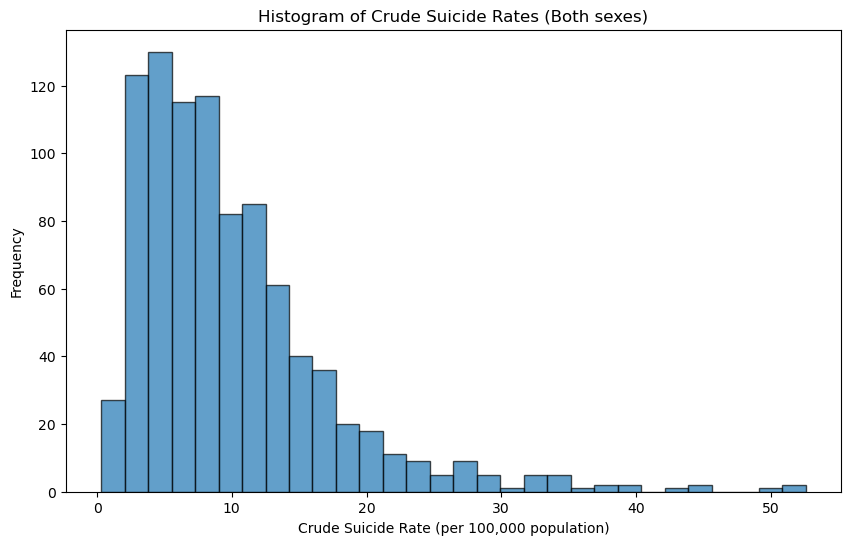

Shapiro-Wilk Test Statistic: 0.8337
p-value: 0.0000
The data is not normally distributed. Applying transformation.


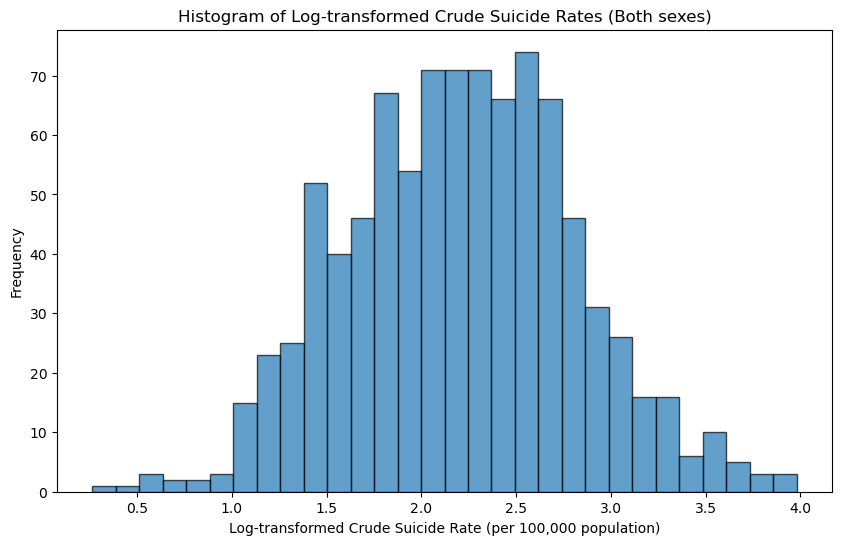

Shapiro-Wilk Test Statistic (Log-transformed): 0.9975
p-value (Log-transformed): 0.1819


In [47]:
from scipy import stats
# Adjust the 'Sex' column to have meaningful values
long_format['Sex'] = long_format['Sex'].replace({
    'Suicide_rate_both': 'Both sexes',
    'Suicide_rate_male': 'Male',
    'Suicide_rate_female': 'Female'
})

# Filter the data for 'Both sexes'
both_sexes = long_format[long_format['Sex'] == 'Both sexes']

# Ensure that 'Crude_suicide_rate' is numeric, coercing errors to NaN
both_sexes['Crude_suicide_rate'] = pd.to_numeric(both_sexes['Crude_suicide_rate'], errors='coerce')

# Drop NaN values that might have resulted from conversion
both_sexes = both_sexes.dropna(subset=['Crude_suicide_rate'])

# Create a histogram of Crude suicide rates
plt.figure(figsize=(10, 6))
plt.hist(both_sexes['Crude_suicide_rate'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Crude Suicide Rates (Both sexes)')
plt.xlabel('Crude Suicide Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()

# Check for normality
# Perform Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(both_sexes['Crude_suicide_rate'])

print(f'Shapiro-Wilk Test Statistic: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# If p-value < 0.05, the data is not normally distributed
if p_value < 0.05:
    print('The data is not normally distributed. Applying transformation.')
    
    # Apply log transformation
    both_sexes['Crude_suicide_rate_log'] = np.log1p(both_sexes['Crude_suicide_rate'])
    
    # Create a histogram of the transformed data
    plt.figure(figsize=(10, 6))
    plt.hist(both_sexes['Crude_suicide_rate_log'], bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Log-transformed Crude Suicide Rates (Both sexes)')
    plt.xlabel('Log-transformed Crude Suicide Rate (per 100,000 population)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Check normality again
    stat, p_value = stats.shapiro(both_sexes['Crude_suicide_rate_log'])
    print(f'Shapiro-Wilk Test Statistic (Log-transformed): {stat:.4f}')
    print(f'p-value (Log-transformed): {p_value:.4f}')
else:
    print('The data is normally distributed.')